<a href="https://colab.research.google.com/github/nandyy719/MLalgos/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression as skLinearRegression
%matplotlib inline

In [ ]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.drop(columns = ['X1 transaction date', 'No'], inplace=True)
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.rename(columns = {'X2 house age':'age', 'X3 distance to the nearest MRT station': 'distance_MRT', 'X4 number of convenience stores': 'num_stores', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude', 'Y house price of unit area': 'unit_price'}, inplace = True) #renaming columns for better visualization
df.head()

,age,distance_MRT,num_stores,latitude,longitude,unit_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.nunique()

age             236
distance_MRT    259
num_stores       11
latitude        234
longitude       232
unit_price      270
dtype: int64

In [ ]:
df.isnull().sum()

age             0
distance_MRT    0
num_stores      0
latitude        0
longitude       0
unit_price      0
dtype: int64

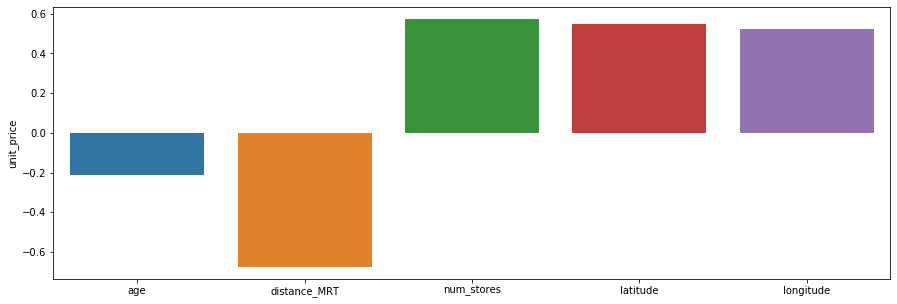

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,5))
sns.barplot(x = corr.columns.drop(['unit_price']),y= corr['unit_price'].drop(labels=['unit_price']))

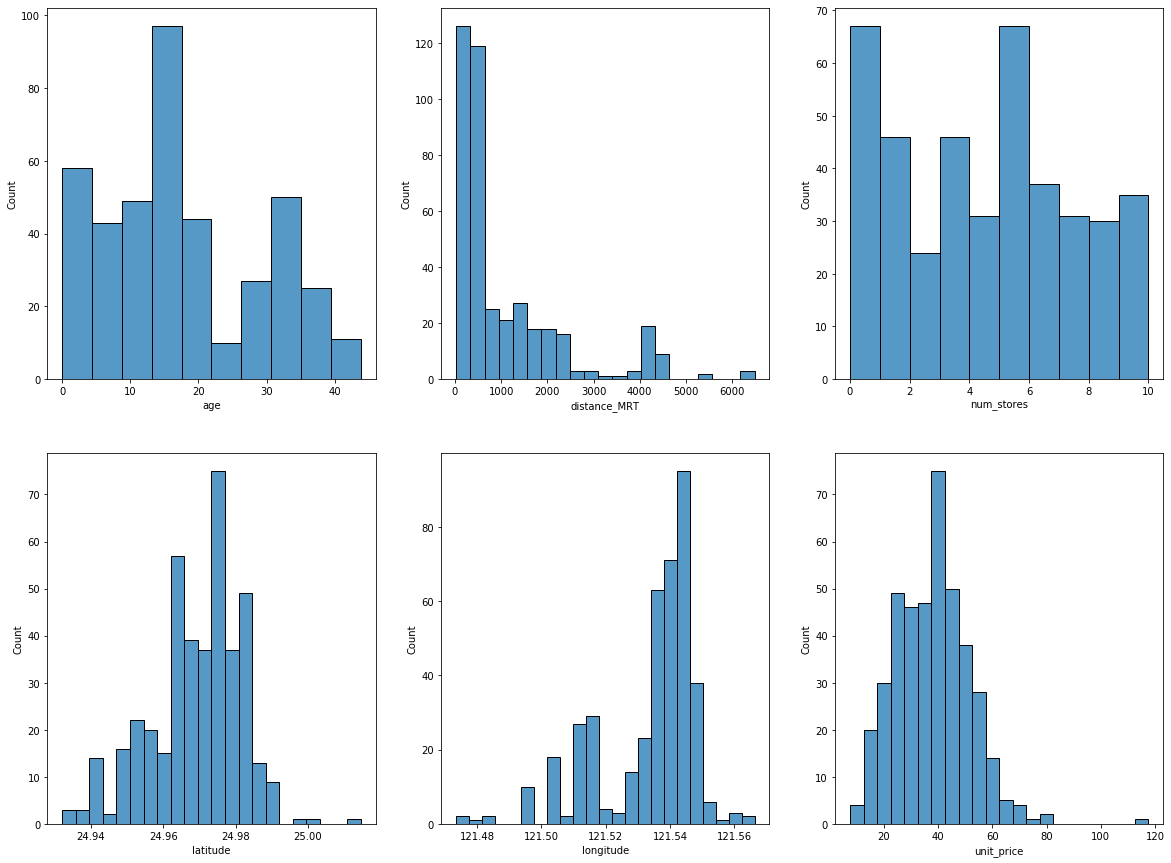

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
col_idx = 0
for i in range(2):
    for j in range(3):
        sns.histplot(data = df, x = df.columns[col_idx], ax=axes[i][j])
        col_idx+=1

In [ ]:
df.drop(columns = ['age'], inplace=True)
X= df.loc[:, 'distance_MRT': 'longitude'].to_numpy()
y = df[['unit_price']].to_numpy()
scale = StandardScaler()
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep = '\n')

(331, 4)
(331, 1)
(83, 4)
(83, 1)


In [ ]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features, 1))
        self.bias = 0
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            loss = y - y_pred
            mse = np.sum(np.square(loss)) / num_samples
            dw = -(2/num_samples) * np.dot(X.T, loss)
            db = -(2/num_samples) * np.sum(loss)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    def score(self, X, y):
        y_pred = self.predict(X)
        res = y - y_pred
        tot = y - y.mean()
        return -(np.sum(np.square(res)) / np.sum(np.square(tot))) + 1


In [ ]:
my_reg = MyLinearRegression(0.01, 1000)
my_reg.fit(X_train, y_train)
my_reg.score(X_test, y_test)


0.5817530564127539

In [ ]:
sk_reg = skLinearRegression()
sk_reg.fit(X_train, y_train)
sk_reg.score(X_test, y_test)

0.581400037478905

In [ ]:
A = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
b = 2*A
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2)

In [ ]:
my_reg.fit(A_train, b_train)

my_reg.score(A_test, b_test)

0.9999999727720625

In [ ]:
sk_reg.fit(A_train, b_train)
sk_reg.score(A_test, b_test)

1.0